###  Step 1 : Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

###  Step 2 : Import  csv file

In [2]:
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [3]:
df.shape

(11251, 15)

 ### Step 3 : Data Cleaning

In [4]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.shape

(11251, 15)

In [6]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
df.shape

(11251, 13)

In [8]:
## Check is there any null value
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.shape

(11251, 13)

In [10]:
## drop null values from data
df.dropna(inplace=True)

In [11]:
df.shape

(11239, 13)

In [12]:
## Change datatype of amount column

df['Amount'] = df['Amount'].astype('int')

In [13]:
df['Amount'].dtype

dtype('int32')

In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [15]:
## describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
## We want just description of ( age,orders,Amount )

df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


###  Step 4: Exploratory Data Analysis (EDA)

###  Gender 
(Analyze buyers and purchasing power on the basis of  Gender)

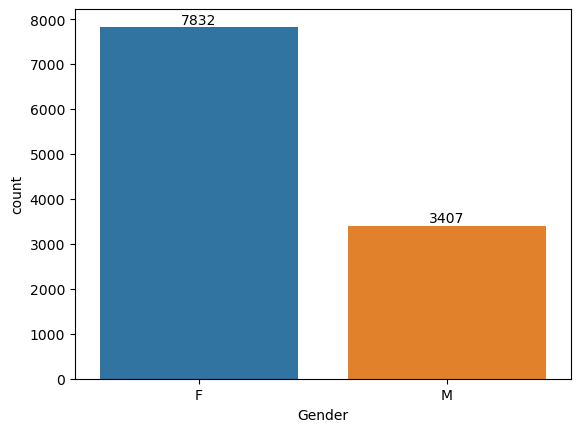

In [16]:
### plotting a bar chart of gender and its count

ax = sns.countplot(x= 'Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

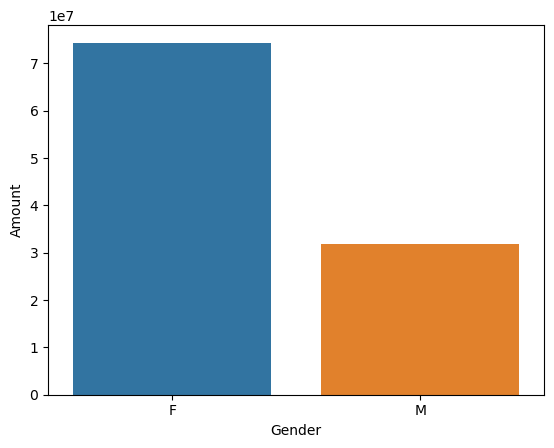

In [17]:
### plotting a bar chart of gender and its Amount
sale_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Gender',y='Amount',data=sale_gen)


* Conclusion :- From the above two graph we can see that Most of the buyers are Females and the purchasing power of female is greater then Male

### Age
Analyze buyers and purchasing power on the basis of age

In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

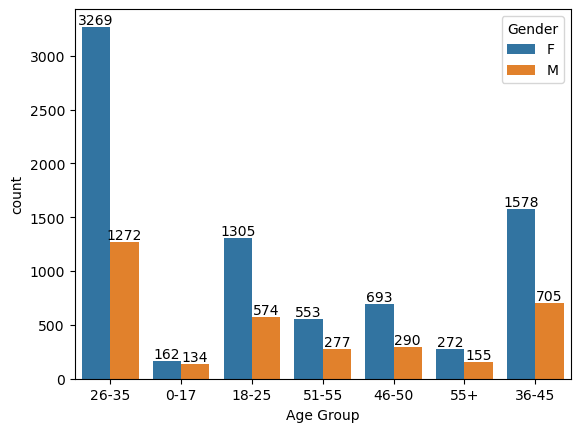

In [20]:
### plot a bars chart on the basis of Age group and its count
ax = sns.countplot(x='Age Group',data=df,hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

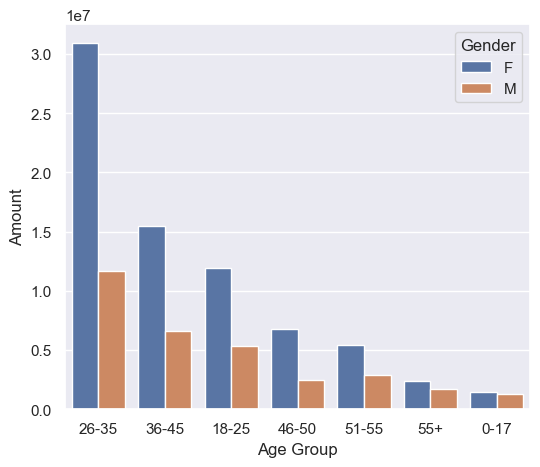

In [108]:
### plotting a bar chart of Age Group and its Amount
sale_age = df.groupby(['Age Group','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)   
sns.barplot(x='Age Group',y='Amount',data=sale_age,hue='Gender')

* Conclusion :- From the above two graph we can see that most of the buyers are of age group between 26-35 yrs females

### State

<Axes: xlabel='State', ylabel='Orders'>

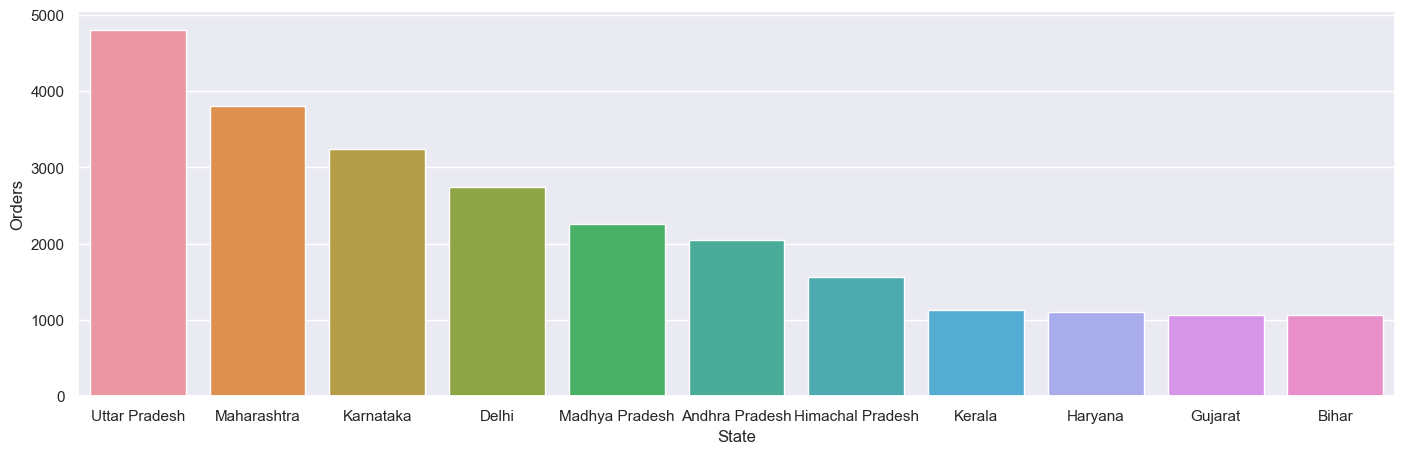

In [21]:
### Analyze total number of orders from the top 11 states

sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(11)
sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

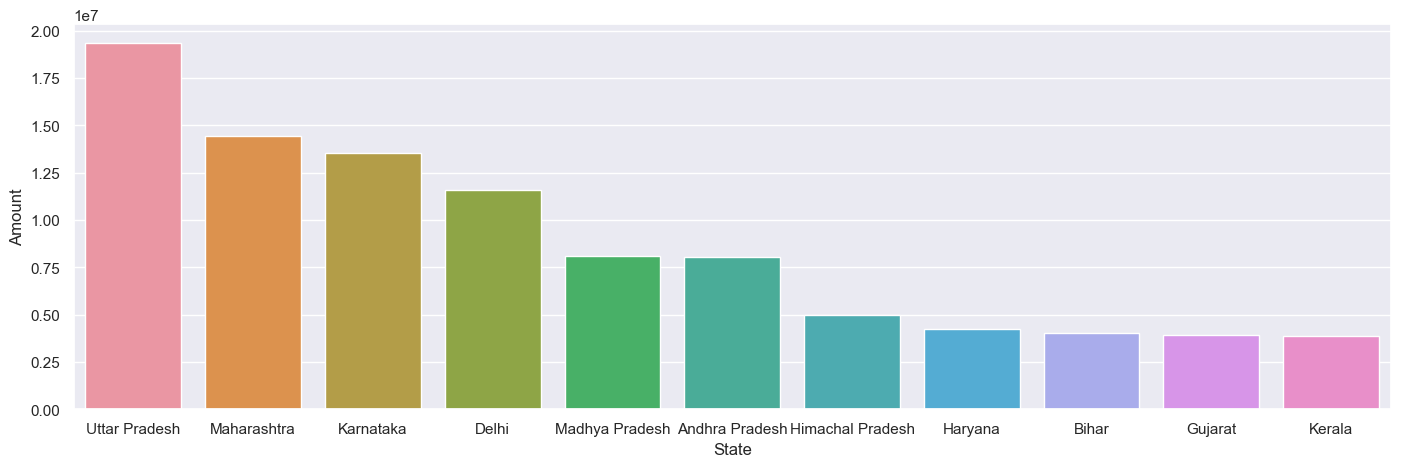

In [22]:
# total amount/sales from top 11 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(11)

sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

* Conclusion :- From the above two graph we can say that most of the orders and sales/ purchasing power are from UP, Maharashtra and karnataka

### Marital Status

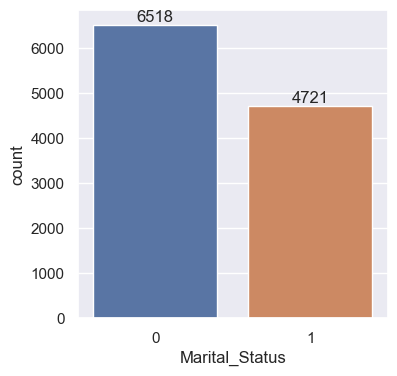

In [28]:
### plot a bars chart on the basis of Marital Status (0 indicate Married and 1 indicate unmarried)
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(4,4)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

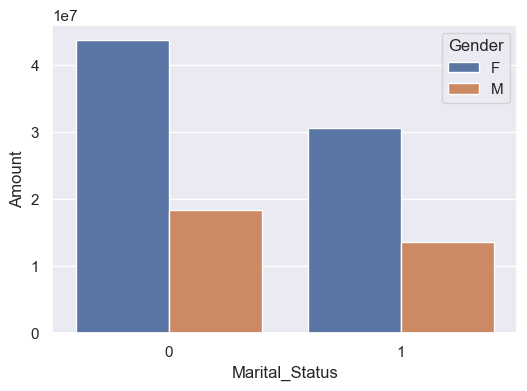

In [40]:
### plot a bars chart on the basis of Marital Status and its Amount

sales_state = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,4)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

* Conclusion :- From the above two graph we can say that most of the buyers are married(womens) and their purchasing power are high

### Occupation

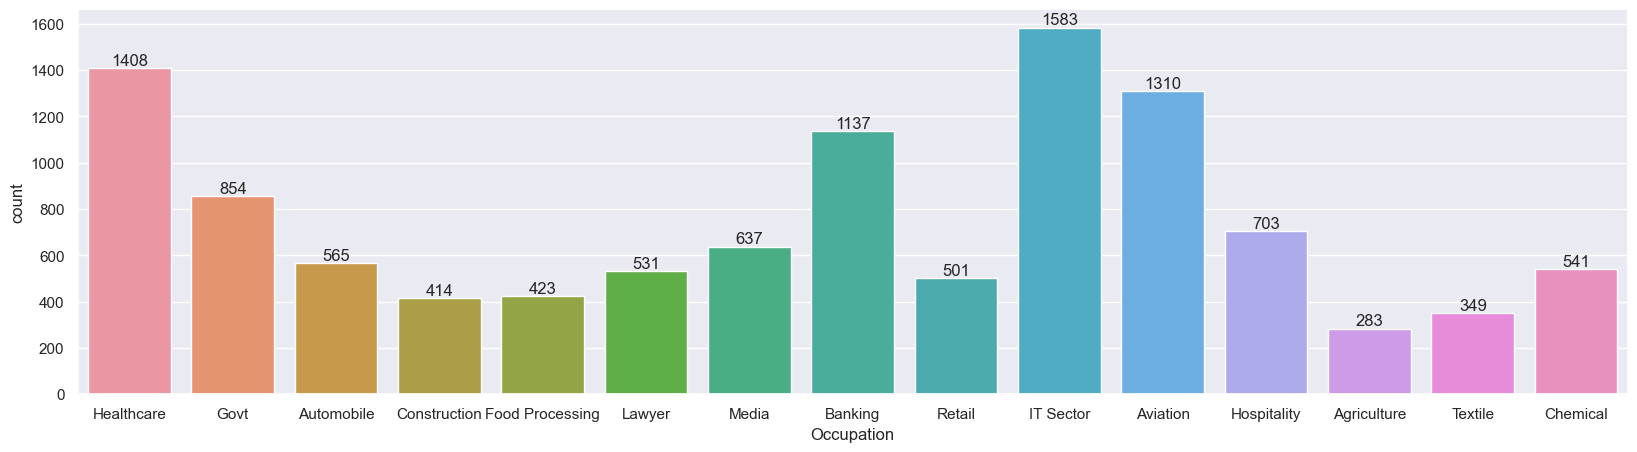

In [53]:
## Plot a Bar chart on the basis of Occupation (Buyers belong to which industry)

ax = sns.countplot(x='Occupation',data=df)
sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

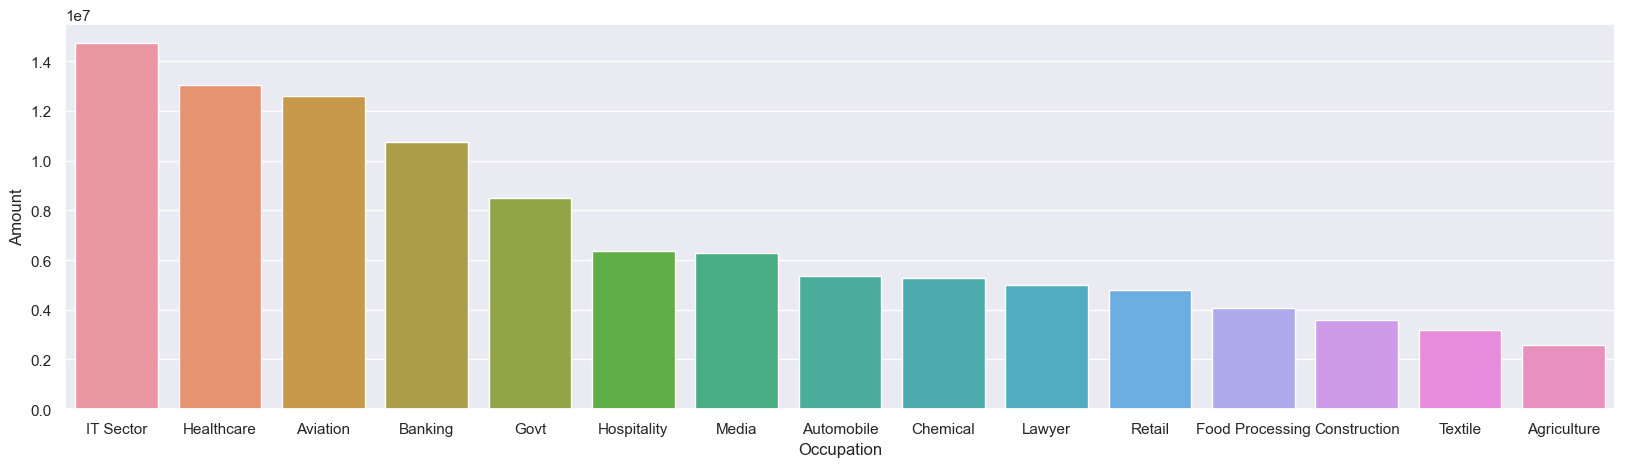

In [69]:
### plot a bars chart on the basis of Occupation and its Amount

sales_ocptn = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_ocptn, x = 'Occupation',y= 'Amount')

* Conclusion :- From the above two graph we can see that most of the buyers are working in  IT, Health and Aviation and their purchasing power are high 

### Product Category

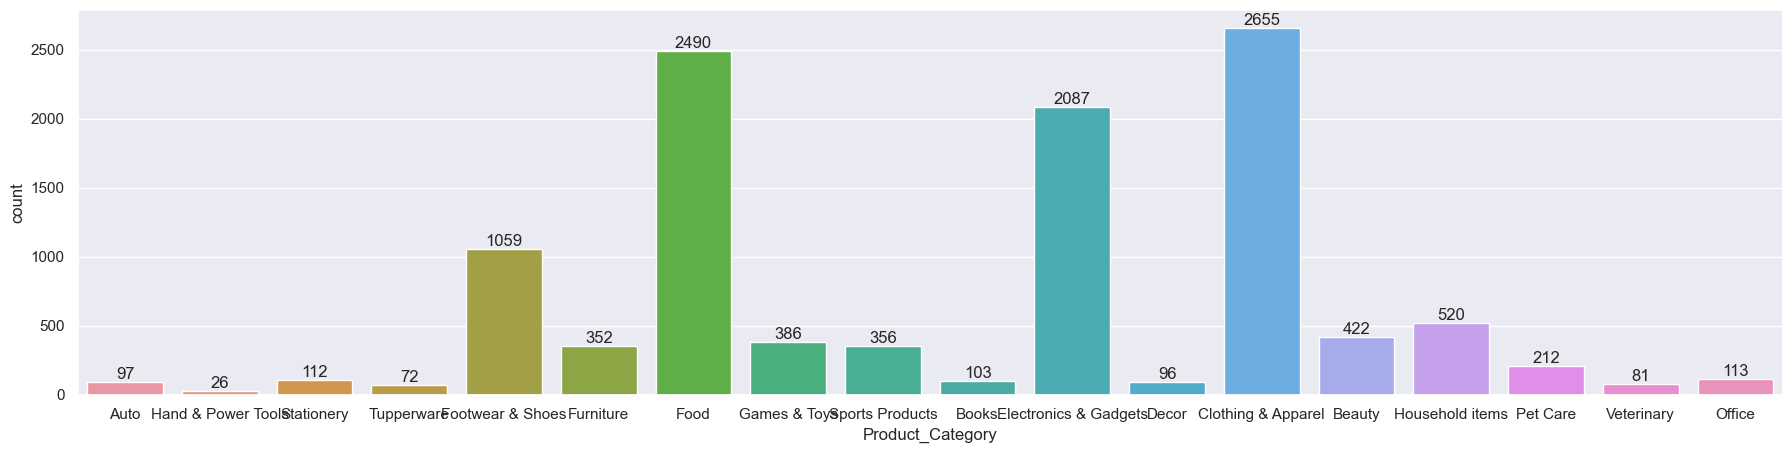

In [81]:
## Plot a bar chart on the basis of Product_Category

ax = sns.countplot(x='Product_Category', data = df)
sns.set(rc={'figure.figsize':(24,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

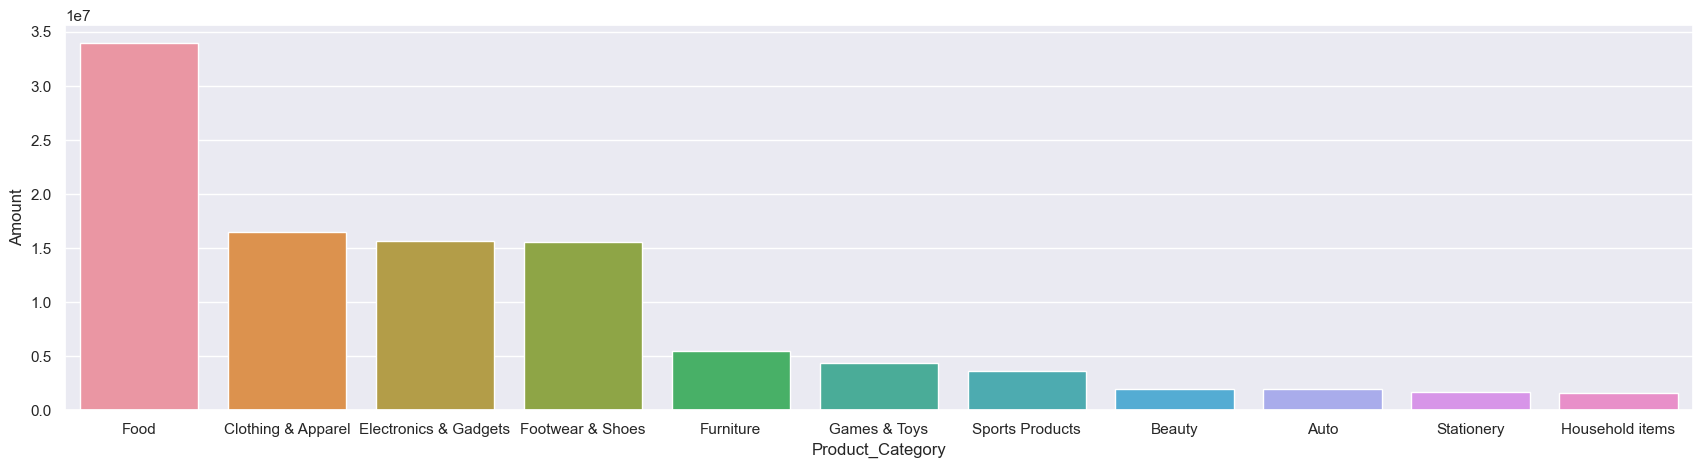

In [86]:
### plot a bars chart on the basis of Product_Category and its Amount

sales_ocptn = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(11)

sns.set(rc={'figure.figsize':(21,5)})
sns.barplot(data = sales_ocptn, x = 'Product_Category',y= 'Amount')

* Conclusion :- From the above two graph we can say that most of the sold products are from clothing,food,electronic gadgets and Food has high purchasing power.

### Product Id

* Analyze which product id purchase maximum order

<Axes: xlabel='Product_ID', ylabel='Orders'>

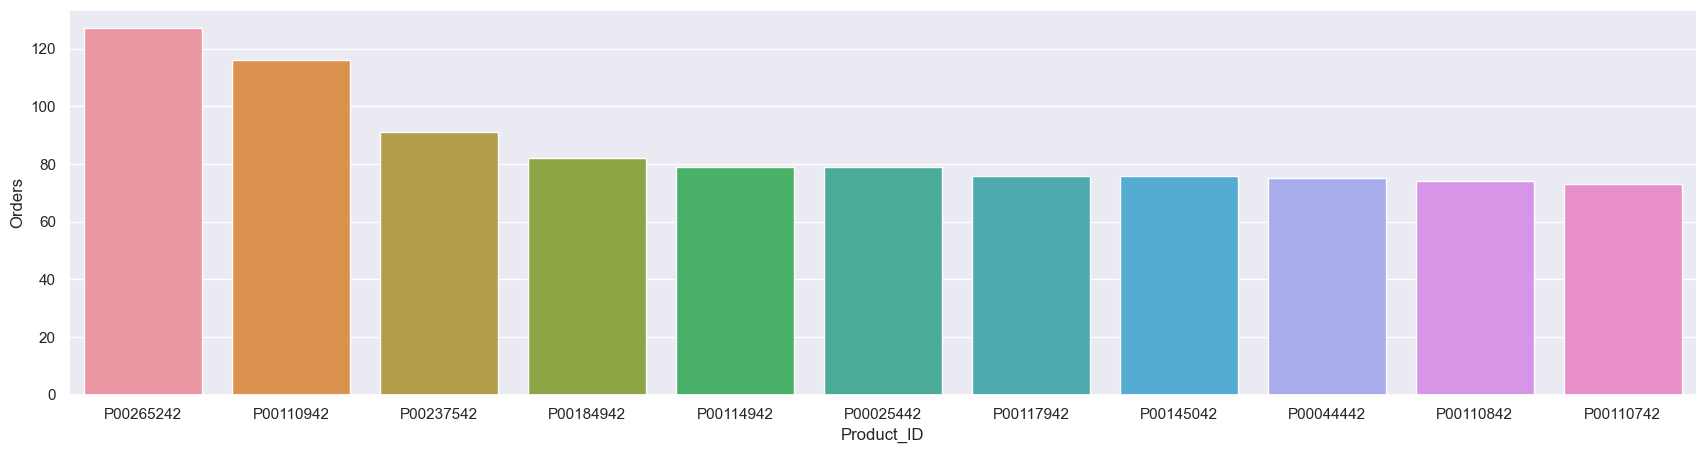

In [97]:
### plot a bars chart on the basis of Product_ID and Orders

sales_ocptn = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(11)

sns.set(rc={'figure.figsize':(21,5)})
sns.barplot(data = sales_ocptn, x = 'Product_ID',y= 'Orders')

* Analyze top 10 most sold product

<Axes: xlabel='Product_ID'>

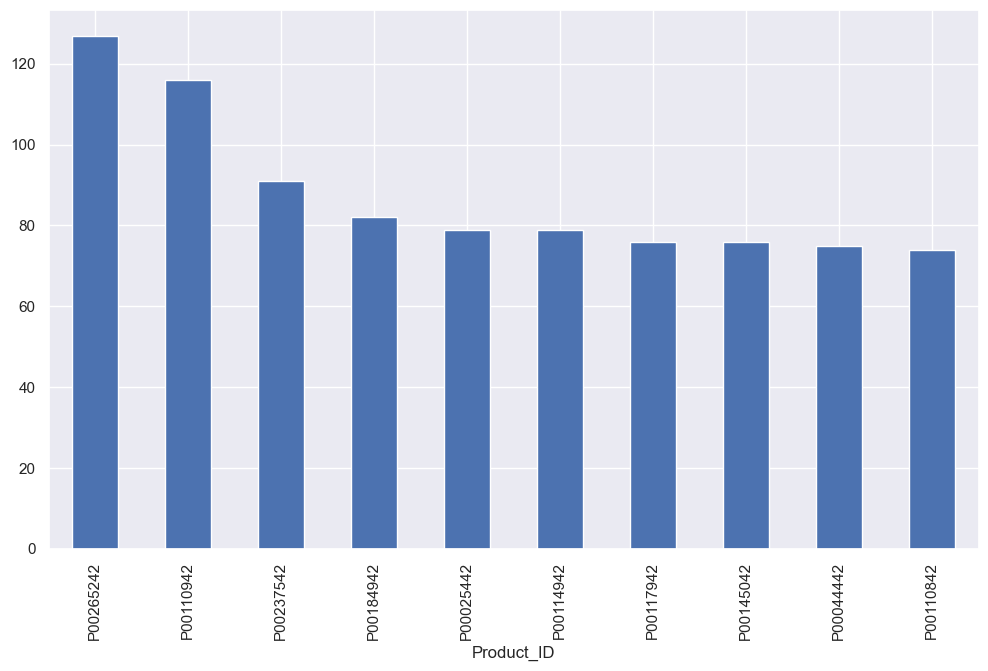

In [98]:
# top 10 most sold products 

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## Final Conclusion of this Project

* Most of the buyers are married woman age group 26-35 yrs from UP, Maharashtra and karnataka working in It ,Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronic Category.